In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from keras.models import Model
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [13]:
train=pd.read_csv("train.csv");
test=pd.read_csv("test.csv");

In [14]:
train['Dates'] = pd.to_datetime(train['Dates'])
train['Month'] = train['Dates'].dt.month
train['Hours'] = train['Dates'].dt.hour
train['Minute'] = train['Dates'].dt.minute
test['Dates'] = pd.to_datetime(test['Dates'])
test['Month'] = test['Dates'].dt.month
test['Hours'] = test['Dates'].dt.hour
test['Minute'] = test['Dates'].dt.minute
train['Year'] = train['Dates'].dt.year
test['Year'] = test['Dates'].dt.year

In [15]:
le = LabelEncoder()
train['PdDistrict'] = le.fit_transform(train['PdDistrict'])
train['Address'] = le.fit_transform(train['Address'])
train['Category'] = le.fit_transform(train['Category'])
train['DayOfWeek'] = le.fit_transform(train['DayOfWeek'])
test['PdDistrict'] = le.fit_transform(test['PdDistrict'])
test['Address'] = le.fit_transform(test['Address'])
test['DayOfWeek'] = le.fit_transform(test['DayOfWeek'])


In [16]:
df1 = pd.DataFrame(train)
df3 = pd.DataFrame(test)
a=df1[['X','Y','Hours','Month','Year','PdDistrict','Address','DayOfWeek']]
c=df3[['X','Y','Hours','Month','Year','PdDistrict','Address','DayOfWeek']]

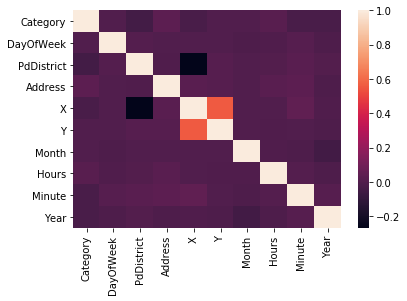

In [17]:
sns.heatmap(df1.corr());

In [18]:
params = {
    'max_depth': 6,
    'eta': 0.3,
    'num_boost_rounds' : 150 ,
    'silent': 1,
    'objective': 'multi:softprob',
    'eval_metric' : 'mlogloss',
    'learning_data' : 0.07,
    'num_class': 39,
}
model = xgb.XGBClassifier(params)


/home/adarsh/anaconda3/lib/python3.7/site-packages/xgboost/core.py:430: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning)


In [19]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(max_depth=16, random_state=42, n_jobs=-1, verbose=3)

In [20]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [21]:
"Using XGBoost"
"Based on Location"
X_Loc=df1[['X','Y','PdDistrict','Address']]
X_Temp=df1[['Hours','Minute','Month','Year','DayOfWeek']]
X_Loc_Test=df3[['X','Y','PdDistrict','Address']]
X_Temp_Test=df3[['Hours','Minute','Month','Year','DayOfWeek']]
model.fit(X_Loc,train['Category'])
Prob_Loc=model.predict_proba(X_Loc)
Prob_Loc_Test=model.predict_proba(X_Loc_Test)
"Based on Time"
model.fit(X_Temp,train['Category'])
Prob_Temp=model.predict_proba(X_Temp)
Prob_Temp_Test=model.predict_proba(X_Temp_Test)

/home/adarsh/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:06:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/adarsh/anaconda3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[16:15:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
"Giving Equal weightage to both spatio and temporal data"
Average=(Prob_Temp_Test+Prob_Loc_Test)/2
avg=pd.DataFrame(Average)
avg.columns=['ARSON','ASSAULT','BAD CHECKS','BRIBERY','BURGLARY','DISORDERLY CONDUCT','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS','EMBEZZLEMENT','EXTORTION','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING','KIDNAPPING','LARCENY/THEFT','LIQUOR LAWS','LOITERING','MISSING PERSON','NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION','RECOVERED VEHICLE','ROBBERY','RUNAWAY','SECONDARY CODES','SEX OFFENSES FORCIBLE','SEX OFFENSES NON FORCIBLE','STOLEN PROPERTY','SUICIDE','SUSPICIOUS OCC','TREA','TRESPASS','VANDALISM','VEHICLE THEFT','WARRANTS','WEAPON LAWS']
avg.to_csv('AVG_XG.csv', index=True)

In [25]:
loc=pd.DataFrame(Prob_Loc)
temp=pd.DataFrame(Prob_Temp)
temp.columns=[38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77]
X=pd.concat([loc, temp], axis=1)
loc_test=pd.DataFrame(Prob_Loc_Test)
temp_test=pd.DataFrame(Prob_Temp_Test)
temp_test.columns=[38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77]
X_test=pd.concat([loc_test, temp_test], axis=1)

In [26]:
Y=np.array(train['Category']).reshape(-1,1)
Y=to_categorical(Y,num_classes=39)

In [27]:
"Neural Net to combine both these values"
model = Sequential()
model.add(Dense(1000, input_dim=78, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(39, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(np.array(X), Y, epochs=5, batch_size=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
878049/878049 [==============================] - 15s 18us/step - loss: 2.3107 - acc: 0.3139
Epoch 2/5
878049/878049 [==============================] - 15s 17us/step - loss: 2.2258 - acc: 0.3284
Epoch 3/5
878049/878049 [==============================] - 16s 18us/step - loss: 2.2084 - acc: 0.3312
Epoch 4/5
878049/878049 [==============================] - 15s 18us/step - loss: 2.1985 - acc: 0.3325
Epoch 5/5
878049/878049 [==============================] - 15s 17us/step - loss: 2.1903 - acc: 0.3342


In [28]:
Y_test_xg=model.predict(X_test)
Y_XG=pd.DataFrame(Y_test_xg)
Y_XG.columns=['ARSON','ASSAULT','BAD CHECKS','BRIBERY','BURGLARY','DISORDERLY CONDUCT','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS','EMBEZZLEMENT','EXTORTION','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING','KIDNAPPING','LARCENY/THEFT','LIQUOR LAWS','LOITERING','MISSING PERSON','NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION','RECOVERED VEHICLE','ROBBERY','RUNAWAY','SECONDARY CODES','SEX OFFENSES FORCIBLE','SEX OFFENSES NON FORCIBLE','STOLEN PROPERTY','SUICIDE','SUSPICIOUS OCC','TREA','TRESPASS','VANDALISM','VEHICLE THEFT','WARRANTS','WEAPON LAWS']
Y_XG.to_csv('XG.csv', index=True)

In [29]:
"Based on Random Forest"

"Based on Location"
X_Loc=df1[['X','Y','PdDistrict','Address']]
X_Temp=df1[['Hours','Minute','Month','Year','DayOfWeek']]
X_Loc_Test=df3[['X','Y','PdDistrict','Address']]
X_Temp_Test=df3[['Hours','Minute','Month','Year','DayOfWeek']]

rfr.fit(X_Loc,train['Category'])
y_loc=rfr.predict(X_Loc)
Prob_Loc=rfr.predict_proba(X_Loc)
Prob_Loc_Test=rfr.predict_proba(X_Loc_Test)
"Based on Time"
rfr.fit(X_Temp,train['Category'])
y_temp=rfr.predict(X_Temp)
Prob_Temp=rfr.predict_proba(X_Temp)
Prob_Temp_Test=rfr.predict_proba(X_Temp_Test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 56 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  23 out of 100 | elapsed:    4.5s remaining:   15.0s


building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:    7.1s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  91 out of 100 | elapsed:    7.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=56)]: Using backend ThreadingBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  23 out of 100 | elapsed:    3.7s remaining:   12.5s
[Parallel(n_jobs=56)]: Done  57 out of 100 | elapsed:    8.2s remaining:    6.2s
[Parallel(n_jobs=56)]: Done  91 out of 100 | elapsed:   13.1s remaining:    1.3s
[Parallel(n_jobs=56)]: Done 100 out of 100 | elapsed:   14.5s finished
[Parallel(n_jobs=56)]: Using backend ThreadingBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  23 out of 100 | elapsed:    3.7s remaining:   12.5s
[Parallel(n_jobs=56)]: Done  57 out of 100 | elapsed:    9.1s remaining:    6.9s
[Parallel(n_jobs=56)]: Done  91 out of 100 | elapsed:   15.1s remaining:    1.5s
[Parallel(n_jobs=56)]: Done 100 out of 100 | e

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100building tree 35 of 100

building tree 36 of 100
building tree 37 of 100
building tree 38 of 100building tree 39 of 100

building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done  23 out of 100 | elapsed:    2.7s remaining:    9.0s



building tree 98 of 100
building tree 99 of 100
building tree 100 of 100




[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:    3.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  91 out of 100 | elapsed:    4.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=56)]: Using backend ThreadingBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  23 out of 100 | elapsed:    3.6s remaining:   12.0s
[Parallel(n_jobs=56)]: Done  57 out of 100 | elapsed:    7.4s remaining:    5.6s
[Parallel(n_jobs=56)]: Done  91 out of 100 | elapsed:   12.3s remaining:    1.2s
[Parallel(n_jobs=56)]: Done 100 out of 100 | elapsed:   13.8s finished
[Parallel(n_jobs=56)]: Using backend ThreadingBackend with 56 concurrent workers.
[Parallel(n_jobs=56)]: Done  23 out of 100 | elapsed:    3.6s remaining:   12.2s
[Parallel(n_jobs=56)]: Done  57 out of 100 | elapsed:    9.5s remaining:    7.2s
[Parallel(n_jobs=56)]: Done  91 out of 100 | elapsed:   15.0s remaining:    1.5s
[Parallel(n_jobs=56)]: Done 100 out of 100 | e

In [30]:
"Giving Equal weightage to both spatio and temporal data"
Average=(Prob_Temp_Test+Prob_Loc_Test)/2
avg=pd.DataFrame(Average)
avg.columns=['ARSON','ASSAULT','BAD CHECKS','BRIBERY','BURGLARY','DISORDERLY CONDUCT','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS','EMBEZZLEMENT','EXTORTION','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING','KIDNAPPING','LARCENY/THEFT','LIQUOR LAWS','LOITERING','MISSING PERSON','NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION','RECOVERED VEHICLE','ROBBERY','RUNAWAY','SECONDARY CODES','SEX OFFENSES FORCIBLE','SEX OFFENSES NON FORCIBLE','STOLEN PROPERTY','SUICIDE','SUSPICIOUS OCC','TREA','TRESPASS','VANDALISM','VEHICLE THEFT','WARRANTS','WEAPON LAWS']
avg.to_csv('AVG_RF.csv', index=True)

In [31]:
loc=pd.DataFrame(Prob_Loc)
temp=pd.DataFrame(Prob_Temp)
temp.columns=[38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77]
X=pd.concat([loc, temp], axis=1)
loc_test=pd.DataFrame(Prob_Loc_Test)
temp_test=pd.DataFrame(Prob_Temp_Test)
temp_test.columns=[38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77]
X_test=pd.concat([loc_test, temp_test], axis=1)

In [32]:
"Neural Net to combine both these values"
model = Sequential()
model.add(Dense(1000, input_dim=78, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(39, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(np.array(X), Y, epochs=5, batch_size=1000)

Epoch 1/5
878049/878049 [==============================] - 17s 19us/step - loss: 1.8585 - acc: 0.4351
Epoch 2/5
878049/878049 [==============================] - 17s 19us/step - loss: 1.6292 - acc: 0.4721
Epoch 3/5
878049/878049 [==============================] - 17s 19us/step - loss: 1.5747 - acc: 0.4805
Epoch 4/5
878049/878049 [==============================] - 17s 19us/step - loss: 1.5455 - acc: 0.4851
Epoch 5/5
878049/878049 [==============================] - 17s 20us/step - loss: 1.5239 - acc: 0.4882


In [33]:
Y_test_rf=model.predict(X_test)
Y_RF=pd.DataFrame(Y_test_rf)
Y_RF.columns=['ARSON','ASSAULT','BAD CHECKS','BRIBERY','BURGLARY','DISORDERLY CONDUCT','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS','EMBEZZLEMENT','EXTORTION','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING','KIDNAPPING','LARCENY/THEFT','LIQUOR LAWS','LOITERING','MISSING PERSON','NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION','RECOVERED VEHICLE','ROBBERY','RUNAWAY','SECONDARY CODES','SEX OFFENSES FORCIBLE','SEX OFFENSES NON FORCIBLE','STOLEN PROPERTY','SUICIDE','SUSPICIOUS OCC','TREA','TRESPASS','VANDALISM','VEHICLE THEFT','WARRANTS','WEAPON LAWS']
Y_RF.to_csv('RF.csv', index=True)

In [34]:
"Based on CAT"
"Based on Location"
X_Loc=df1[['X','Y','PdDistrict','Address']]
X_Temp=df1[['Hours','Minute','Month','Year','DayOfWeek']]
X_Loc_Test=df3[['X','Y','PdDistrict','Address']]
X_Temp_Test=df3[['Hours','Minute','Month','Year','DayOfWeek']]
cat.fit(X_Loc,train['Category'])
y_loc=cat.predict(X_Loc)
Prob_Loc=cat.predict_proba(X_Loc)
Prob_Loc_Test=cat.predict_proba(X_Loc_Test)
"Based on Time"
cat.fit(X_Temp,train['Category'])
y_temp=cat.predict(X_Temp)
Prob_Temp=cat.predict_proba(X_Temp)
Prob_Temp_Test=cat.predict_proba(X_Temp_Test)

Learning rate set to 0.1118
0:	learn: 3.3027991	total: 1.13s	remaining: 18m 48s
1:	learn: 3.1377439	total: 2.16s	remaining: 17m 57s
2:	learn: 3.0262699	total: 3.3s	remaining: 18m 15s
3:	learn: 2.9431671	total: 4.39s	remaining: 18m 13s
4:	learn: 2.8779568	total: 5.39s	remaining: 17m 53s
5:	learn: 2.8228386	total: 6.43s	remaining: 17m 46s
6:	learn: 2.7792541	total: 7.48s	remaining: 17m 41s
7:	learn: 2.7407393	total: 8.63s	remaining: 17m 50s
8:	learn: 2.7102723	total: 9.73s	remaining: 17m 51s
9:	learn: 2.6843655	total: 10.9s	remaining: 17m 57s
10:	learn: 2.6626269	total: 11.9s	remaining: 17m 52s
11:	learn: 2.6434694	total: 13s	remaining: 17m 50s
12:	learn: 2.6257768	total: 14.2s	remaining: 17m 54s
13:	learn: 2.6114269	total: 15.2s	remaining: 17m 47s
14:	learn: 2.5992369	total: 16.2s	remaining: 17m 42s
15:	learn: 2.5882669	total: 17.2s	remaining: 17m 39s
16:	learn: 2.5792373	total: 18.3s	remaining: 17m 35s
17:	learn: 2.5707026	total: 19.2s	remaining: 17m 29s
18:	learn: 2.5628070	total: 20.

In [35]:
"Giving Equal weightage to both spatio and temporal data"
Average=(Prob_Temp_Test+Prob_Loc_Test)/2
avg=pd.DataFrame(Average)
avg.columns=['ARSON','ASSAULT','BAD CHECKS','BRIBERY','BURGLARY','DISORDERLY CONDUCT','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS','EMBEZZLEMENT','EXTORTION','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING','KIDNAPPING','LARCENY/THEFT','LIQUOR LAWS','LOITERING','MISSING PERSON','NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION','RECOVERED VEHICLE','ROBBERY','RUNAWAY','SECONDARY CODES','SEX OFFENSES FORCIBLE','SEX OFFENSES NON FORCIBLE','STOLEN PROPERTY','SUICIDE','SUSPICIOUS OCC','TREA','TRESPASS','VANDALISM','VEHICLE THEFT','WARRANTS','WEAPON LAWS']
avg.to_csv('AVG_CAT.csv', index=True)

In [36]:
loc=pd.DataFrame(Prob_Loc)
temp=pd.DataFrame(Prob_Temp)
temp.columns=[38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77]
X=pd.concat([loc, temp], axis=1)
loc_test=pd.DataFrame(Prob_Loc_Test)
temp_test=pd.DataFrame(Prob_Temp_Test)
temp_test.columns=[38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77]
X_test=pd.concat([loc_test, temp_test], axis=1)

In [37]:
"Neural Net to combine both these values"
model = Sequential()
model.add(Dense(1000, input_dim=78, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(39, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(np.array(X), Y, epochs=5, batch_size=1000)

Epoch 1/5
878049/878049 [==============================] - 18s 21us/step - loss: 2.3374 - acc: 0.3063
Epoch 2/5
878049/878049 [==============================] - 17s 20us/step - loss: 2.2606 - acc: 0.3189
Epoch 3/5
878049/878049 [==============================] - 17s 20us/step - loss: 2.2452 - acc: 0.3219
Epoch 4/5
878049/878049 [==============================] - 18s 20us/step - loss: 2.2368 - acc: 0.3234
Epoch 5/5
878049/878049 [==============================] - 17s 20us/step - loss: 2.2299 - acc: 0.3242


In [38]:
Y_test_cat=model.predict(X_test)
Y_CAT=pd.DataFrame(Y_test_cat)
Y_CAT.columns=['ARSON','ASSAULT','BAD CHECKS','BRIBERY','BURGLARY','DISORDERLY CONDUCT','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS','EMBEZZLEMENT','EXTORTION','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING','KIDNAPPING','LARCENY/THEFT','LIQUOR LAWS','LOITERING','MISSING PERSON','NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION','RECOVERED VEHICLE','ROBBERY','RUNAWAY','SECONDARY CODES','SEX OFFENSES FORCIBLE','SEX OFFENSES NON FORCIBLE','STOLEN PROPERTY','SUICIDE','SUSPICIOUS OCC','TREA','TRESPASS','VANDALISM','VEHICLE THEFT','WARRANTS','WEAPON LAWS']
Y_CAT.to_csv('CAT.csv', index=True)